In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import folium
from folium.plugins import FloatImage
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

In [4]:
pd.set_option('display.max_columns',None)
listings_data = pd.read_csv('/Users/Jaeung Han/Documents/listings_June.csv',header=0,delimiter = ',', low_memory= False)
listings_data.head()


id                         listing_url       scrape_id last_scraped  \
0   1419   https://www.airbnb.com/rooms/1419  20200608201242   2020-06-09   
1   8077   https://www.airbnb.com/rooms/8077  20200608201242   2020-06-09   
2  12604  https://www.airbnb.com/rooms/12604  20200608201242   2020-06-09   
3  23691  https://www.airbnb.com/rooms/23691  20200608201242   2020-06-09   
4  26654  https://www.airbnb.com/rooms/26654  20200608201242   2020-06-09   

                                                name  \
0                    Beautiful home in amazing area!   
1                 Downtown Harbourfront Private Room   
2                     Seaton Village Parlour Bedroom   
3                    Queen Bedroom close to downtown   
4  World Class downtown @CN Tower Theatre MTCC ga...   

                                             summary  \
0  This large, family home is located in one of T...   
1  Guest room in a luxury condo with access to al...   
2   Comfortable sofa bed in airy main floor parlour.   
3                                                NaN   
4  CN Tower, TIFF Bell Lightbox, Metro Convention...   

                                               space  \
0  Visit Toronto with this fabulous furnished hom...   
1  My husband and I are both artists. I give pain...   
2  Family of 4 (2 kids)  plus a friendly dog open...   
3  Nestled in the middle of a quiet residential n...   
4  Welcome to 5***** Living - Bohemian decor~ in ...   

                                         description experiences_offered  \
0  This large, family home is located in one of T...                none   
1  Guest room in a luxury condo with access to al...                none   
2  Comfortable sofa bed in airy main floor parlou...                none   
3  Nestled in the middle of a quiet residential n...                none   
4  CN Tower, TIFF Bell Lightbox, Metro Convention...                none   

                               neighborhood_overview  \
0  The apartment is located in the Ossington stri...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  There's a reason they call it the Entertainmen...   

                                               notes  \
0  To learn a little more about our home, see: (U...   
1                                                NaN   
2                                                NaN   
3  * Laundry facilities are available at the prem...   
4                                                NaN   

                                             transit  \
0  All forms of public transportation are easily ...   
1                                                NaN   
2                                                NaN   
3  * Public transit is conveniently located about...   
4  Walk everywhere! Transit at your doorstep, end...   

                                      access  \
0  The whole house and garden are available.   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4            100% use of space and amenities   

                                         interaction  \
0  We will be out of town, but fully accessible b...   
1                                                NaN   
2                                                NaN   
3  You are welcome to contact us at any time if t...   
4                                                NaN   

                                         house_rules  thumbnail_url  \
0  This is our much-loved family home. We expect ...            NaN   
1                                 No smoking please.            NaN   
2                                         no smoking            NaN   
3  * Guests are requested to leave their shoes at...            NaN   
4  No Smoking Parking Available on Request ($20 d...            NaN   

   medium_u

In [5]:
data = listings_data[['host_is_superhost',	'host_total_listings_count',	'host_has_profile_pic',	'host_identity_verified',	'neighbourhood'	,'property_type'	,'room_type',	'accommodates',	'bathrooms',	'bedrooms'	,'beds'	,	'price',	'security_deposit'	,'cleaning_fee',	'guests_included',	'extra_people',	'minimum_nights'	,'availability_90'	,'number_of_reviews',	'review_scores_rating'	,'cancellation_policy',	'reviews_per_month']]
data.head(20)

host_is_superhost  host_total_listings_count host_has_profile_pic  \
0                  f                        1.0                    t   
1                  f                        2.0                    t   
2                  f                        1.0                    t   
3                  f                        2.0                    t   
4                  f                        7.0                    t   
5                  f                        1.0                    t   
6                  t                        3.0                    t   
7                  f                        2.0                    t   
8                  t                        3.0                    t   
9                  t                        2.0                    t   
10                 t                       13.0                    t   
11                 f                        1.0                    t   
12                 f                       10.0                    t   
13                 f                       10.0                    t   
14                 f                       10.0                    t   
15                 f                       10.0                    t   
16                 f                        1.0                    t   
17                 t                       13.0                    t   
18                 f                        0.0                    t   
19                 t                        6.0                    t   

   host_identity_verified           neighbourhood property_type  \
0                       t         Little Portugal         House   
1                       f        Downtown Toronto     Apartment   
2                       t               The Annex         House   
3                       t                Fairbank         House   
4                       t        Downtown Toronto   Condominium   
5                       t       Greenwood-Coxwell     Apartment   
6                       f              Davisville     Apartment   
7                       f            Harbourfront     Apartment   
8                       f                Parkdale         House   
9                       t                Oakridge     Apartment   
10                      t  Entertainment District   Condominium   
11                      t        Wexford/Maryvale      Bungalow   
12                      t                Rosedale     Apartment   
13                      t         Garden District   Condominium   
14                      t                Rosedale     Apartment   
15                      t        Downtown Toronto     Apartment   
16                      t                 Niagara   Condominium   
17                      t            Harbourfront   Condominium   
18                      f               Riverdale         House   
19                      f                 Niagara         House   

          room_type  accommodates  bathrooms  bedrooms  beds    price  \
0   Entire home/apt            10        3.0       5.0   7.0  $469.00   
1      Private room             2        1.5       1.0   1.0  $100.00   
2      Private room             1        1.5       1.0   1.0   $67.00   
3      Private room             3        1.0       1.0   1.0   $72.00   
4   Entire home/apt             5        1.0       1.0   2.0  $119.00   
5   Entire home/apt             1        1.0       0.0   1.0   $54.00   
6   Entire home/apt             1        1.0       0.0   0.0   $60.00   
7   Entire home/apt             2        1.5       1.0   2.0  $134.00   
8   Entire home/apt             5        1.0       2.0   2.0  $100.00   
9   Entire home/apt             2        1.0       0.0   1.0   $68.00   
10  Entire home/apt             4        2.0       3.0   3.0  $135.00   
11     Private room             4        1.0       2.0   2.0   $90.00   
12  Entire home/apt             2        1.0       1.0   1.0  $100.00   
13  Entire home/apt             3        1.0       0.0   1.0

In [6]:
#Observe na values for each variable
data.isna().sum()


host_is_superhost               2
host_total_listings_count       2
host_has_profile_pic            2
host_identity_verified          2
neighbourhood                   1
property_type                   0
room_type                       0
accommodates                    0
bathrooms                      10
bedrooms                       27
beds                          218
price                           0
security_deposit             5146
cleaning_fee                 3486
guests_included                 0
extra_people                    0
minimum_nights                  0
availability_90                 0
number_of_reviews               0
review_scores_rating         4509
cancellation_policy             0
reviews_per_month            4235
dtype: int64

In [7]:
def na_drop(data,threshold):
    threshold = threshold/100
    is_null = data.isna().sum()/len(data)
    missing_var = is_null[is_null > 0.3].index
    data.drop(missing_var,axis = 1 , inplace = True)
    return None

In [8]:
na_drop(data,30)
data.isna().sum().sort_values(ascending = False)

security_deposit             5146
review_scores_rating         4509
reviews_per_month            4235
cleaning_fee                 3486
beds                          218
bedrooms                       27
bathrooms                      10
host_total_listings_count       2
host_has_profile_pic            2
host_identity_verified          2
host_is_superhost               2
neighbourhood                   1
cancellation_policy             0
price                           0
extra_people                    0
accommodates                    0
room_type                       0
property_type                   0
number_of_reviews               0
availability_90                 0
guests_included                 0
minimum_nights                  0
dtype: int64

In [9]:
data.head(20)

host_is_superhost  host_total_listings_count host_has_profile_pic  \
0                  f                        1.0                    t   
1                  f                        2.0                    t   
2                  f                        1.0                    t   
3                  f                        2.0                    t   
4                  f                        7.0                    t   
5                  f                        1.0                    t   
6                  t                        3.0                    t   
7                  f                        2.0                    t   
8                  t                        3.0                    t   
9                  t                        2.0                    t   
10                 t                       13.0                    t   
11                 f                        1.0                    t   
12                 f                       10.0                    t   
13                 f                       10.0                    t   
14                 f                       10.0                    t   
15                 f                       10.0                    t   
16                 f                        1.0                    t   
17                 t                       13.0                    t   
18                 f                        0.0                    t   
19                 t                        6.0                    t   

   host_identity_verified           neighbourhood property_type  \
0                       t         Little Portugal         House   
1                       f        Downtown Toronto     Apartment   
2                       t               The Annex         House   
3                       t                Fairbank         House   
4                       t        Downtown Toronto   Condominium   
5                       t       Greenwood-Coxwell     Apartment   
6                       f              Davisville     Apartment   
7                       f            Harbourfront     Apartment   
8                       f                Parkdale         House   
9                       t                Oakridge     Apartment   
10                      t  Entertainment District   Condominium   
11                      t        Wexford/Maryvale      Bungalow   
12                      t                Rosedale     Apartment   
13                      t         Garden District   Condominium   
14                      t                Rosedale     Apartment   
15                      t        Downtown Toronto     Apartment   
16                      t                 Niagara   Condominium   
17                      t            Harbourfront   Condominium   
18                      f               Riverdale         House   
19                      f                 Niagara         House   

          room_type  accommodates  bathrooms  bedrooms  beds    price  \
0   Entire home/apt            10        3.0       5.0   7.0  $469.00   
1      Private room             2        1.5       1.0   1.0  $100.00   
2      Private room             1        1.5       1.0   1.0   $67.00   
3      Private room             3        1.0       1.0   1.0   $72.00   
4   Entire home/apt             5        1.0       1.0   2.0  $119.00   
5   Entire home/apt             1        1.0       0.0   1.0   $54.00   
6   Entire home/apt             1        1.0       0.0   0.0   $60.00   
7   Entire home/apt             2        1.5       1.0   2.0  $134.00   
8   Entire home/apt             5        1.0       2.0   2.0  $100.00   
9   Entire home/apt             2        1.0       0.0   1.0   $68.00   
10  Entire home/apt             4        2.0       3.0   3.0  $135.00   
11     Private room             4        1.0       2.0   2.0   $90.00   
12  Entire home/apt             2        1.0       1.0   1.0  $100.00   
13  Entire home/apt             3        1.0       0.0   1.0

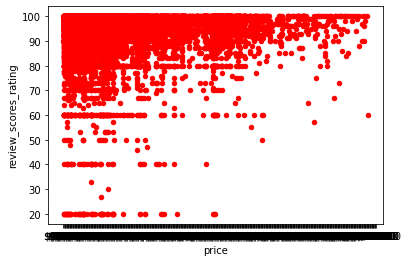

In [10]:
data.plot(kind = 'scatter' ,x = 'price',y = 'review_scores_rating',color='red' )
plt.show()

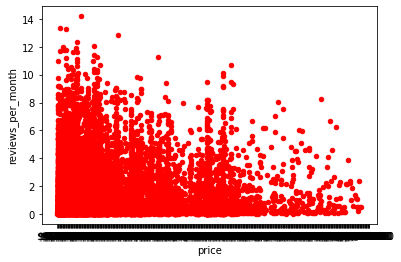

In [11]:
data.plot(kind = 'scatter' ,x = 'price',y = 'reviews_per_month',color='red' )
plt.show()

In [12]:
#Convert dollar values to float values
#cols = ['price','security_deposit','cleaning_fee','extra_people']
def currency_clean(data):
    all_columns = list(data.columns)
    for cols in all_columns:
        if '$' in str(data[cols]):
            data[cols] = data[cols].replace('[\$,]', '', regex=True).astype(float)
        else:
            pass
currency_clean(data)

#According to the scatter plots, filling in missing data with mean value for review_scores_rating and reviews_per_month seems reasonable
data['review_scores_rating'].fillna(data['review_scores_rating'].mode(), inplace = True)
data['reviews_per_month'].fillna(data['reviews_per_month'].mode(), inplace = True)

#Fill in missing values for security_deposit and cleaning_fee with 0
data['security_deposit'].fillna(0, inplace = True)
data['cleaning_fee'].fillna(0, inplace = True)

#data.select_dtypes(include = ['float']).head()
#data.round(0).astype(int)

In [13]:
data.isna().sum()

host_is_superhost               2
host_total_listings_count       2
host_has_profile_pic            2
host_identity_verified          2
neighbourhood                   1
property_type                   0
room_type                       0
accommodates                    0
bathrooms                      10
bedrooms                       27
beds                          218
price                           0
security_deposit                0
cleaning_fee                    0
guests_included                 0
extra_people                    0
minimum_nights                  0
availability_90                 0
number_of_reviews               0
review_scores_rating         4509
cancellation_policy             0
reviews_per_month            4235
dtype: int64

In [14]:
#Remove remaining rows that contains na values
data = data.dropna()
data.isna().sum()

host_is_superhost            0
host_total_listings_count    0
host_has_profile_pic         0
host_identity_verified       0
neighbourhood                0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
price                        0
security_deposit             0
cleaning_fee                 0
guests_included              0
extra_people                 0
minimum_nights               0
availability_90              0
number_of_reviews            0
review_scores_rating         0
cancellation_policy          0
reviews_per_month            0
dtype: int64

In [15]:
#Standardize the data between range [0,1]
#sc = MinMaxScaler()
#num_var = data.select_dtypes(exclude=['object']) #create a dataframe including only numerical variables
#data[num_var.columns] = sc.fit_transform(num_var)
data.head(20)

host_is_superhost  host_total_listings_count host_has_profile_pic  \
0                  f                        1.0                    t   
1                  f                        2.0                    t   
3                  f                        2.0                    t   
4                  f                        7.0                    t   
5                  f                        1.0                    t   
6                  t                        3.0                    t   
7                  f                        2.0                    t   
8                  t                        3.0                    t   
9                  t                        2.0                    t   
11                 f                        1.0                    t   
12                 f                       10.0                    t   
13                 f                       10.0                    t   
14                 f                       10.0                    t   
15                 f                       10.0                    t   
16                 f                        1.0                    t   
18                 f                        0.0                    t   
19                 t                        6.0                    t   
20                 f                        2.0                    t   
21                 f                       10.0                    t   
22                 t                        2.0                    t   

   host_identity_verified      neighbourhood property_type        room_type  \
0                       t    Little Portugal         House  Entire home/apt   
1                       f   Downtown Toronto     Apartment     Private room   
3                       t           Fairbank         House     Private room   
4                       t   Downtown Toronto   Condominium  Entire home/apt   
5                       t  Greenwood-Coxwell     Apartment  Entire home/apt   
6                       f         Davisville     Apartment  Entire home/apt   
7                       f       Harbourfront     Apartment  Entire home/apt   
8                       f           Parkdale         House  Entire home/apt   
9                       t           Oakridge     Apartment  Entire home/apt   
11                      t   Wexford/Maryvale      Bungalow     Private room   
12                      t           Rosedale     Apartment  Entire home/apt   
13                      t    Garden District   Condominium  Entire home/apt   
14                      t           Rosedale     Apartment     Private room   
15                      t   Downtown Toronto     Apartment  Entire home/apt   
16                      t            Niagara   Condominium     Private room   
18                      f          Riverdale         House     Private room   
19                      f            Niagara         House     Private room   
20                      t     Dufferin Grove         House     Private room   
21                      t           Rosedale   Condominium  Entire home/apt   
22                      t     Dufferin Grove         House  Entire home/apt   

    accommodates  bathrooms  bedrooms  beds  price  security_deposit  \
0             10        3.0       5.0   7.0  469.0            1000.0   
1              2        1.5       1.0   1.0  100.0            2680.0   
3              3        1.0       1.0   1.0   72.0               0.0   
4              5        1.0       1.0   2.0  119.0             300.0   
5              1        1.0       0.0   1.0   54.0               0.0   
6              1        1.0       0.0   0.0   60.0             500.0   
7              2        1.5       1.0   2.0  134.0            4020.0   
8              5        1.0       2.0   2.0  100.0            1250.0   
9              2        1.0       0.0   1.0   68.0               0.0   
11             4        1.0       2.0   2.0   90.0             250.0   
12             2        1.0       1.0 

In [16]:
print(data['neighbourhood'].value_counts())
print(data['neighbourhood'].value_counts())
print('\n')
print(data['property_type'].value_counts())
print('\n')
print(data['room_type'].value_counts())
print('\n')
print(data['cancellation_policy'].value_counts())

Downtown Toronto          3854
Entertainment District     991
Niagara                    734
Willowdale                 539
The Annex                  494
                          ... 
Rouge                        8
Manse Valley                 7
Corktown                     6
Markland Woods               4
Toronto Islands              2
Name: neighbourhood, Length: 139, dtype: int64
Downtown Toronto          3854
Entertainment District     991
Niagara                    734
Willowdale                 539
The Annex                  494
                          ... 
Rouge                        8
Manse Valley                 7
Corktown                     6
Markland Woods               4
Toronto Islands              2
Name: neighbourhood, Length: 139, dtype: int64


Apartment                 4790
Condominium               4499
House                     4396
Guest suite                847
Townhouse                  768
Bungalow                   569
Loft                       311
Guest

In [17]:
#Convert object to category
cat_var_list = ['host_is_superhost',	'host_has_profile_pic'	,'host_identity_verified'	,'neighbourhood',	'property_type',	'room_type'	,	'cancellation_policy']

#Apply one hot encoding to categorical variables
data = pd.get_dummies(data,columns = cat_var_list )
data.head()

host_total_listings_count  accommodates  bathrooms  bedrooms  beds  price  \
0                        1.0            10        3.0       5.0   7.0  469.0   
1                        2.0             2        1.5       1.0   1.0  100.0   
3                        2.0             3        1.0       1.0   1.0   72.0   
4                        7.0             5        1.0       1.0   2.0  119.0   
5                        1.0             1        1.0       0.0   1.0   54.0   

   security_deposit  cleaning_fee  guests_included  extra_people  \
0            1000.0         150.0                1           0.0   
1            2680.0           0.0                1           0.0   
3               0.0           0.0                2          20.0   
4             300.0          51.0                2          18.0   
5               0.0           0.0                2           0.0   

   minimum_nights  availability_90  number_of_reviews  review_scores_rating  \
0               4                0                  7                 100.0   
1             180                0                169                  97.0   
3               1                0                217                  95.0   
4              21               33                 40                  95.0   
5             120                0                 26                  98.0   

   reviews_per_month  host_is_superhost_f  host_is_superhost_t  \
0               0.12                    1                    0   
1               1.28                    1                    0   
3               1.78                    1                    0   
4               0.35                    1                    0   
5               0.21                    1                    0   

   host_has_profile_pic_f  host_has_profile_pic_t  host_identity_verified_f  \
0                       0                       1                         0   
1                       0                       1                         1   
3                       0                       1                         0   
4                       0                       1                         0   
5                       0                       1                         0   

   host_identity_verified_t  neighbourhood_Agincourt  neighbourhood_Alderwood  \
0                         1                        0                        0   
1                         0                        0                        0   
3                         1                        0                        0   
4                         1                        0                        0   
5                         1                        0                        0   

   neighbourhood_Amesbury  neighbourhood_Armour Heights  \
0                       0                             0   
1                       0                             0   
3                       0                             0   
4                       0                             0   
5                       0                             0   

   neighbourhood_Bayview  neighbourhood_Bayview Village  \
0                      0                              0   
1                      0                              0   
3                      0                              0   
4                      0                              0   
5                      0                              0   

   neighbourhood_Bedford Park  neighbourhood_Bendale  \
0                           0                      0   
1                           0                      0   
3                           0                      0   
4                           0                      0   
5                           0                      0   

   neighbourhood_Birch Cliff  neighbourhood_Broadview North  \
0                          0                              0   
1                          0                              0   
3                          0               

In [18]:
# #Convert amenities entries to integers
# amenities_count = []
# for i in data["amenities"]:
#     amenities_count.append(len(i))

# data['amenities'] = amenities_count


In [19]:
data.head()

host_total_listings_count  accommodates  bathrooms  bedrooms  beds  price  \
0                        1.0            10        3.0       5.0   7.0  469.0   
1                        2.0             2        1.5       1.0   1.0  100.0   
3                        2.0             3        1.0       1.0   1.0   72.0   
4                        7.0             5        1.0       1.0   2.0  119.0   
5                        1.0             1        1.0       0.0   1.0   54.0   

   security_deposit  cleaning_fee  guests_included  extra_people  \
0            1000.0         150.0                1           0.0   
1            2680.0           0.0                1           0.0   
3               0.0           0.0                2          20.0   
4             300.0          51.0                2          18.0   
5               0.0           0.0                2           0.0   

   minimum_nights  availability_90  number_of_reviews  review_scores_rating  \
0               4                0                  7                 100.0   
1             180                0                169                  97.0   
3               1                0                217                  95.0   
4              21               33                 40                  95.0   
5             120                0                 26                  98.0   

   reviews_per_month  host_is_superhost_f  host_is_superhost_t  \
0               0.12                    1                    0   
1               1.28                    1                    0   
3               1.78                    1                    0   
4               0.35                    1                    0   
5               0.21                    1                    0   

   host_has_profile_pic_f  host_has_profile_pic_t  host_identity_verified_f  \
0                       0                       1                         0   
1                       0                       1                         1   
3                       0                       1                         0   
4                       0                       1                         0   
5                       0                       1                         0   

   host_identity_verified_t  neighbourhood_Agincourt  neighbourhood_Alderwood  \
0                         1                        0                        0   
1                         0                        0                        0   
3                         1                        0                        0   
4                         1                        0                        0   
5                         1                        0                        0   

   neighbourhood_Amesbury  neighbourhood_Armour Heights  \
0                       0                             0   
1                       0                             0   
3                       0                             0   
4                       0                             0   
5                       0                             0   

   neighbourhood_Bayview  neighbourhood_Bayview Village  \
0                      0                              0   
1                      0                              0   
3                      0                              0   
4                      0                              0   
5                      0                              0   

   neighbourhood_Bedford Park  neighbourhood_Bendale  \
0                           0                      0   
1                           0                      0   
3                           0                      0   
4                           0                      0   
5                           0                      0   

   neighbourhood_Birch Cliff  neighbourhood_Broadview North  \
0                          0                              0   
1                          0                              0   
3                          0               

[0.08471055 0.04301705 0.03077748 0.02545163 0.03519463 0.07772347
 0.10024325 0.02989254 0.07090606 0.09163109 0.07292799 0.11559478
 0.09434747 0.12758202]


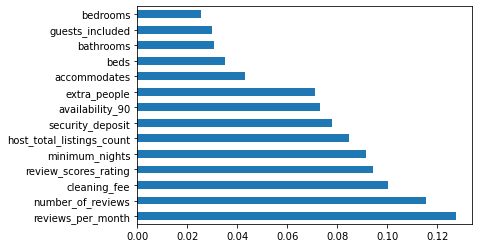

None


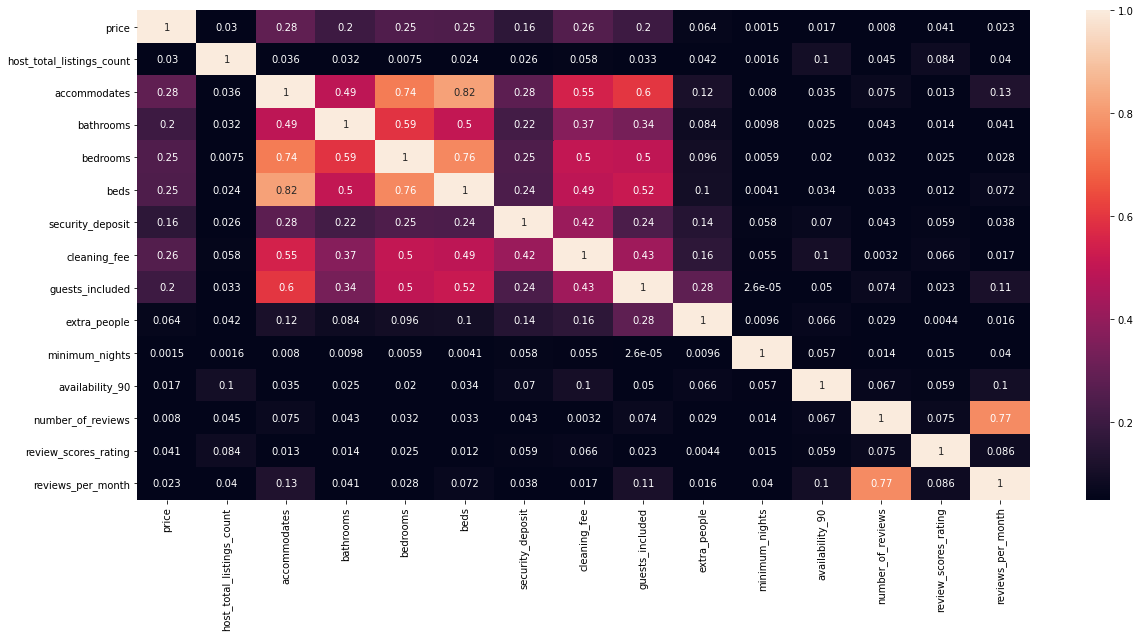

In [20]:
#Determing Feature importance
model = ExtraTreesClassifier()
feat_x =  pd.DataFrame(data, columns = ['host_total_listings_count','accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','availability_90','number_of_reviews','review_scores_rating','reviews_per_month'])
feat_y = data.price
model.fit(feat_x,feat_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=feat_x.columns)
feat_importances.nlargest(20).plot(kind='barh')
print(plt.show())
x_data = pd.DataFrame(data, columns = ['price','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','availability_90','number_of_reviews','review_scores_rating','reviews_per_month'])
corr_matrix = x_data.corr()
corr_matrix = abs(corr_matrix)
f,ax = plt.subplots(figsize = (20,9))
sns.heatmap(corr_matrix,vmax=1,vmin = 0.05, annot=True)


In [21]:
x = pd.DataFrame(data,columns=['host_total_listings_count','accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','availability_90','number_of_reviews','review_scores_rating','reviews_per_month'])
x

host_total_listings_count  accommodates  bathrooms  bedrooms  beds  \
0                            1.0            10        3.0       5.0   7.0   
1                            2.0             2        1.5       1.0   1.0   
3                            2.0             3        1.0       1.0   1.0   
4                            7.0             5        1.0       1.0   2.0   
5                            1.0             1        1.0       0.0   1.0   
...                          ...           ...        ...       ...   ...   
21045                        3.0             4        1.0       1.0   1.0   
21052                        1.0             3        1.0       2.0   2.0   
21075                        3.0             2        1.0       1.0   1.0   
21084                        0.0             7        2.0       3.0   3.0   
21095                        2.0             2        1.0       0.0   1.0   

       security_deposit  cleaning_fee  guests_included  extra_people  \
0                1000.0         150.0                1           0.0   
1                2680.0           0.0                1           0.0   
3                   0.0           0.0                2          20.0   
4                 300.0          51.0                2          18.0   
5                   0.0           0.0                2           0.0   
...                 ...           ...              ...           ...   
21045               0.0           9.0                2          40.0   
21052             250.0          75.0                1           0.0   
21075             250.0          20.0                1           0.0   
21084             500.0         125.0                1          20.0   
21095               0.0           0.0                1           0.0   

       minimum_nights  availability_90  number_of_reviews  \
0                   4                0                  7   
1                 180                0                169   
3                   1                0                217   
4                  21               33                 40   
5                 120                0                 26   
...               ...              ...                ...   
21045               1               84                  3   
21052               2               25                  2   
21075               2               53                  1   
21084               1               80                  1   
21095               3               51                  1   

       review_scores_rating  reviews_per_month  
0                     100.0               0.12  
1                      97.0               1.28  
3                      95.0               1.78  
4                      95.0               0.35  
5                      98.0               0.21  
...                     ...                ...  
21045                 100.0               3.00  
21052                 100.0               2.00  
21075                 100.0               1.00  
21084                 100.0               1.00  
21095                  60.0               1.00  

[16586 rows x 14 columns]

Actual   Predicted
20036   200.0  193.906006
9857    110.0  112.113007
19493   139.0  184.450989
20725    84.0   98.363281
13465    60.0  139.838486
...       ...         ...
10107    35.0   36.826691
12943    51.0   81.910339
5151     39.0   57.381897
20722    44.0  125.394196
3583     60.0   45.883591

[3318 rows x 2 columns]


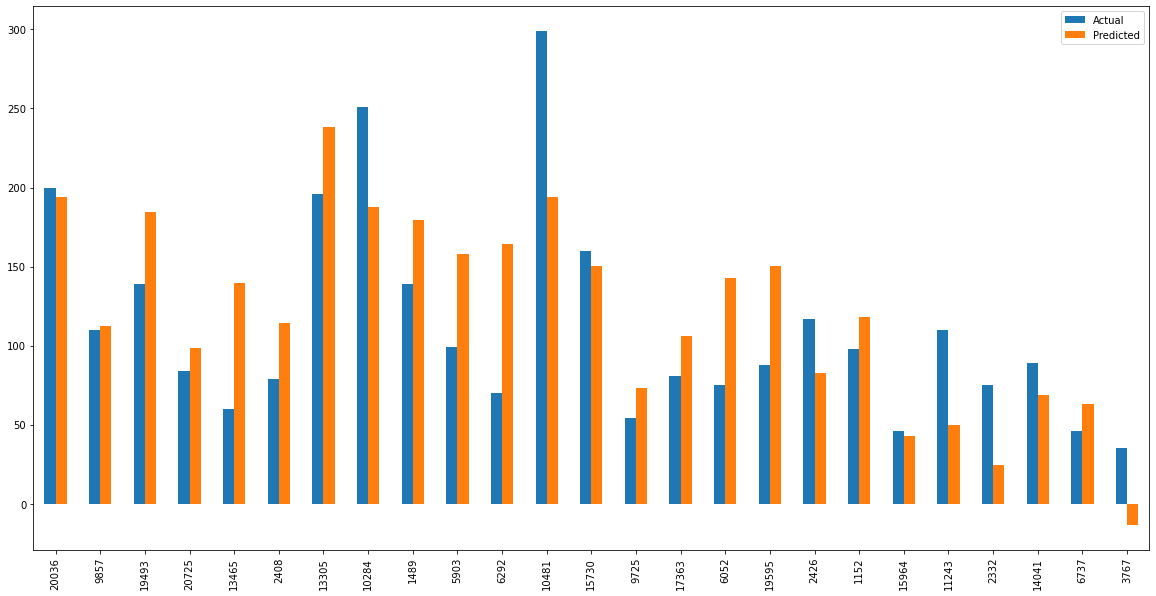

Mean Absolute Error: 52.002909296460004
Mean Squared Error: 25997.610125416028
Root Mean Squared Error: 161.2377441091757


In [22]:
#Split data into train and test data 
x = data.drop('price', axis = 1)
y = data.price

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 1)

norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

# numerical features
num_cols = ['host_total_listings_count',	'accommodates'	,'bathrooms',	'bedrooms'	,'beds','security_deposit',	'cleaning_fee',	'guests_included',	'extra_people',	'minimum_nights',	'availability_90'	,'number_of_reviews',	'review_scores_rating',	'reviews_per_month']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = MinMaxScaler().fit(x_train_stand[[i]])
    
    # transform the training data column
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    
    # transform the testing data column
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

#Linear Regression without any scaling
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
ActualvsPredicted = pd.DataFrame({'Actual' : y_test, 'Predicted':y_pred})
print(ActualvsPredicted)
#Plot result
plot1 = ActualvsPredicted.head(25)
plot1.plot(kind='bar',figsize=(20,10))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# # get importance
# importance = regressor.coef_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

Actual  Predicted
20036   200.0      194.0
9857    110.0      111.5
19493   139.0      182.5
20725    84.0       97.0
13465    60.0      139.0
...       ...        ...
10107    35.0       36.0
12943    51.0       82.5
5151     39.0       57.0
20722    44.0      125.0
3583     60.0       46.5

[3318 rows x 2 columns]


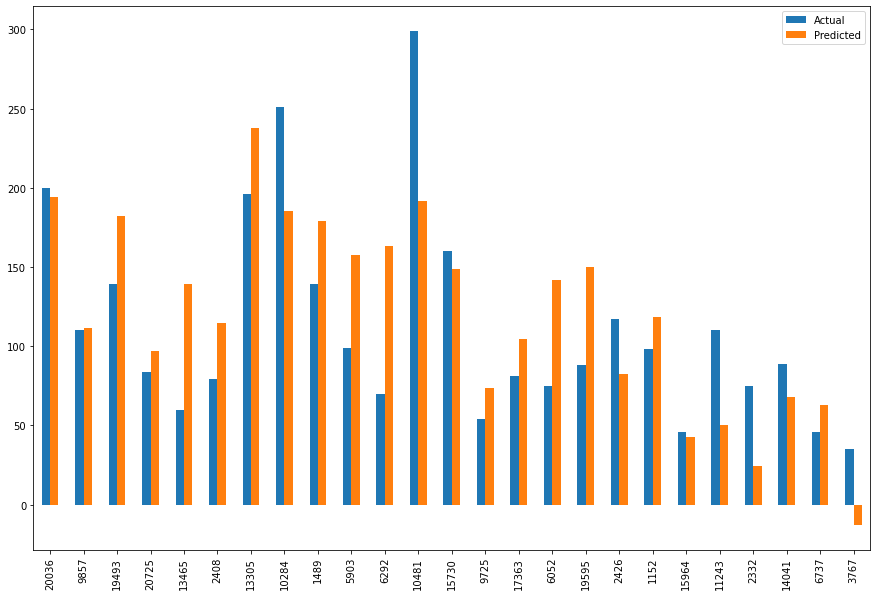

Mean Absolute Error: 51.910186859553946
Mean Squared Error: 25996.582429174203
Root Mean Squared Error: 161.23455718044505


In [23]:
#Linear Regression with normalization
regressor = LinearRegression()
regressor.fit(x_train_norm,y_train)
y_pred_norm = regressor.predict(x_test_norm)
ActualvsPredictednorm = pd.DataFrame({'Actual' : y_test, 'Predicted':y_pred_norm})
print(ActualvsPredictednorm)
#Plot result
plot1 = ActualvsPredictednorm.head(25)
plot1.plot(kind='bar',figsize=(15,10))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_norm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_norm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_norm)))

Actual  Predicted
20036   200.0      194.0
9857    110.0      111.5
19493   139.0      182.5
20725    84.0       97.0
13465    60.0      139.0
...       ...        ...
10107    35.0       36.0
12943    51.0       82.5
5151     39.0       57.0
20722    44.0      125.0
3583     60.0       46.5

[3318 rows x 2 columns]


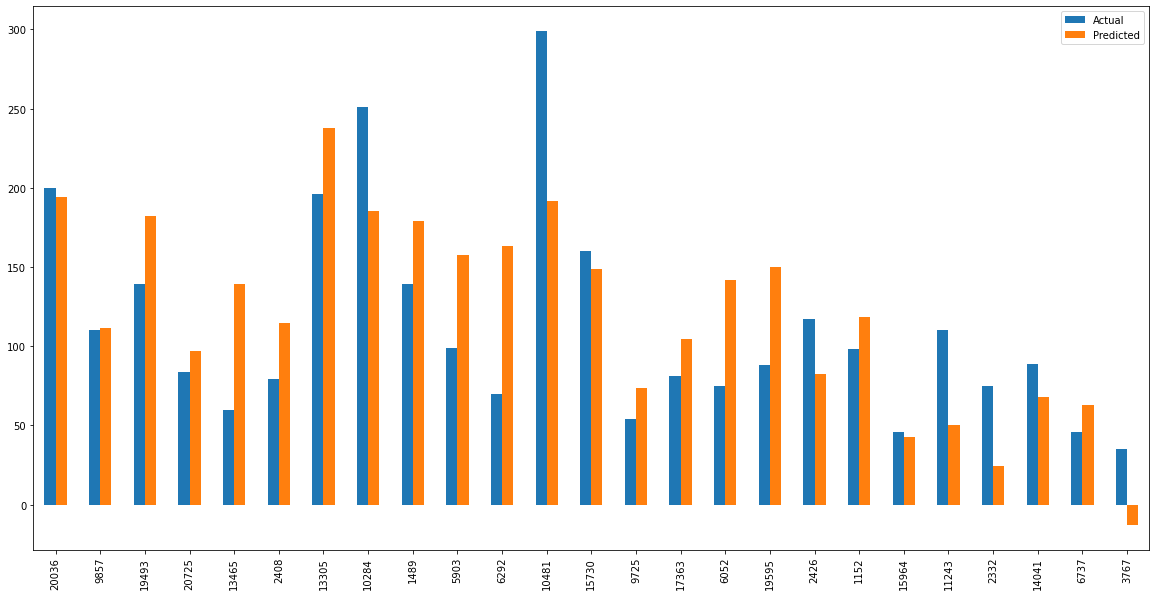

Mean Absolute Error: 51.910186859553946
Mean Squared Error: 25996.582429174203
Root Mean Squared Error: 161.23455718044505


In [24]:
#Linear Regression with standardization
regressor = LinearRegression()
regressor.fit(x_train_stand,y_train)
y_pred_stand = regressor.predict(x_test_stand)
ActualvsPredictedstand = pd.DataFrame({'Actual' : y_test, 'Predicted':y_pred_stand})
print(ActualvsPredictedstand)
#Plot result
plot1 = ActualvsPredictedstand.head(25)
plot1.plot(kind='bar',figsize=(20,10))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_stand))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_stand))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_stand)))

Actual  Predicted
20036   200.0      150.0
9857    110.0      100.0
19493   139.0      139.0
20725    84.0       80.0
13465    60.0       35.0
...       ...        ...
10107    35.0       35.0
12943    51.0       95.0
5151     39.0       60.0
20722    44.0       58.0
3583     60.0       60.0

[3318 rows x 2 columns]


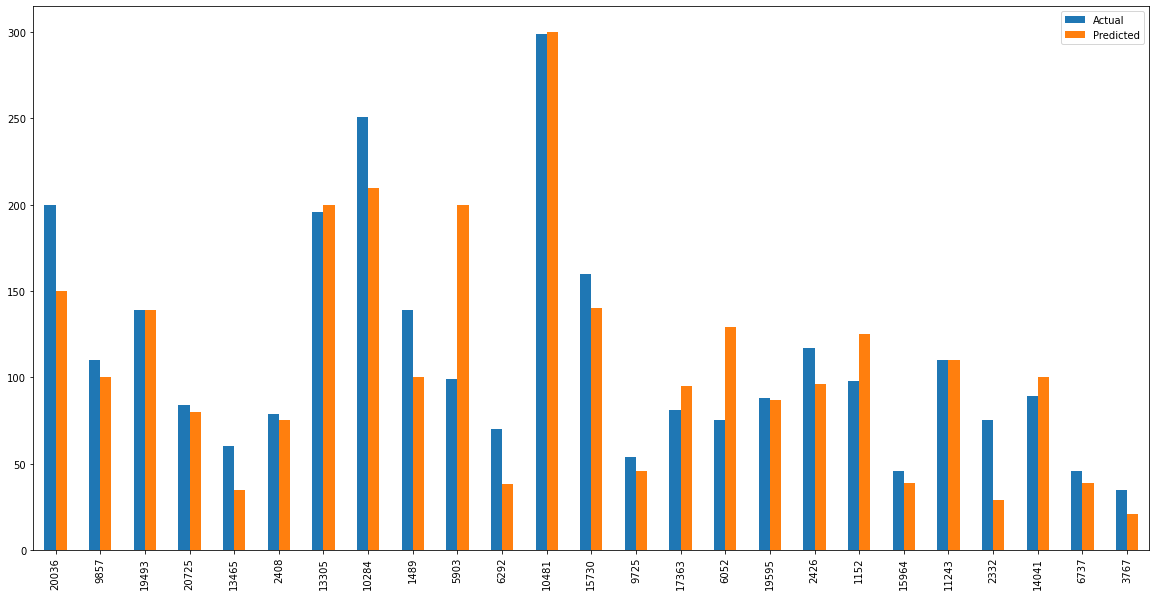

Mean Absolute Error: 70.46955997588908
Mean Squared Error: 183256.35322483422
Root Mean Squared Error: 428.08451645070534


In [25]:
#Apply Decision Tree Regression
TreeRegressor = DecisionTreeRegressor(random_state=45)
TreeRegressor.fit(x_train, y_train)


#Fit model
y_pred_tree = TreeRegressor.predict(x_test)
ActualvsPredictedtree = pd.DataFrame({'Actual' : y_test, 'Predicted':y_pred_tree})
print(ActualvsPredictedtree)
#Plot Result
plot1 = ActualvsPredictedtree.head(25)
plot1.plot(kind='bar',figsize=(20,10))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#Evaluate model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tree))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))

In [33]:
#Apply Decision Tree Classificatoin
TreeClassifier = DecisionTreeClassifier()
TreeClassifier.fit(x_train,y_train)


#Fit model
y_pred_clas = TreeClassifier.predict(x_test)
ActualvsPredictedclas = pd.DataFrame({'Actual' : y_test, 'Predicted':y_pred_clas})
print(ActualvsPredictedclas)

#Evaluate model
print('Accuracy', metrics.accuracy_score(y_test,y_pred_clas))
scores = cross_val_score(TreeClassifier,x,y,cv=10,cv = )

Actual  Predicted
20036   200.0      149.0
9857    110.0      150.0
19493   139.0      145.0
20725    84.0      105.0
13465    60.0       32.0
...       ...        ...
10107    35.0       50.0
12943    51.0      101.0
5151     39.0       50.0
20722    44.0       60.0
3583     60.0       60.0

[3318 rows x 2 columns]
Accuracy 0.07715491259795057
[0.0464135  0.04098855 0.05726341 0.05183846 0.06268837 0.06931887
 0.06694813 0.053076   0.0747889  0.0548854 ]


Actual   Predicted
20036   200.0  111.114380
9857    110.0  101.103096
19493   139.0  119.961678
20725    84.0   79.720161
13465    60.0   43.908909
...       ...         ...
10107    35.0   43.908909
12943    51.0   66.741592
5151     39.0   72.188286
20722    44.0   86.892693
3583     60.0   39.975269

[3318 rows x 2 columns]


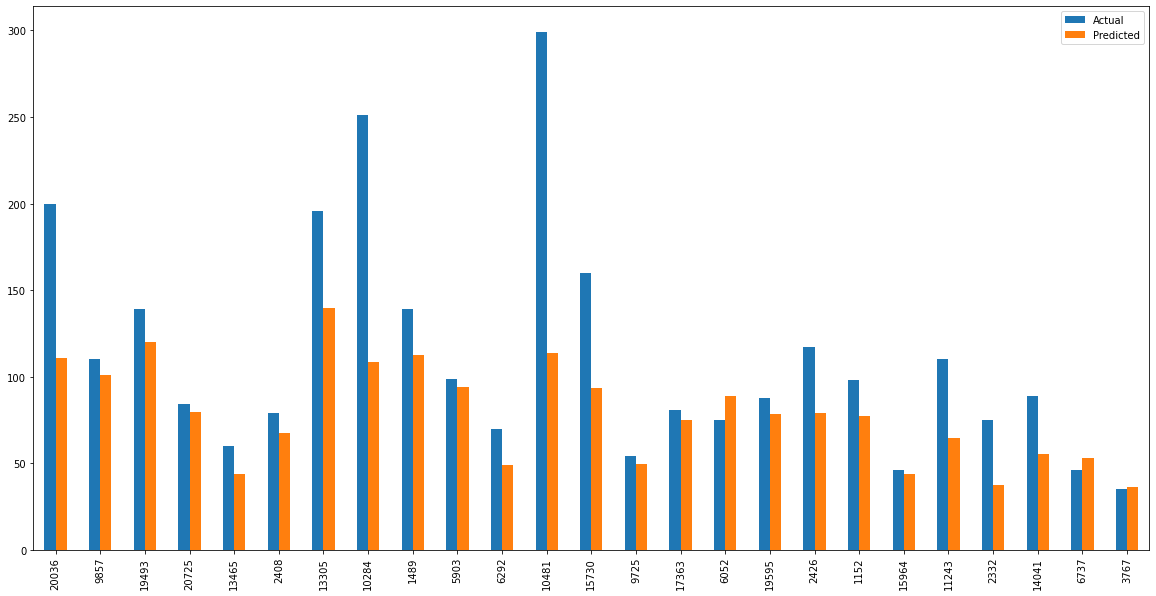

Mean Absolute Error: 52.886347878187664
Mean Squared Error: 28668.56645451528
Root Mean Squared Error: 169.31794486856754


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [27]:
#Apply XGBoost algorithm
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',colsample_bytree= 0.3, learning_rate= 0.1, max_depth= 5, alpha = 10, n_estimators=10)
xg_reg.fit(x_train, y_train)
pred_reg = xg_reg.predict(x_test)
ActualvsPredictedxgb = pd.DataFrame({'Actual' : y_test, 'Predicted':pred_reg})
print(ActualvsPredictedxgb)

#Plot Result
plot1 = ActualvsPredictedxgb.head(25)
plot1.plot(kind='bar',figsize=(20,10))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#Evaluate model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_reg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_reg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_reg)))


In [28]:
# pred_clas = xgb.XGBClassifier(learning_rate=0.1)
# pred_clas.fit(x_train,y_train)
# #Fit model
# y_pred_xgbclass = pred_clas.predict(x_test)
# ActualvsPredictedxgbclass = pd.DataFrame({'Actual' : y_test, 'Predicted':y_pred_xgbclass})
# print(ActualvsPredictedxgbclass)

# #Evaluate model
# print('Accuracy', metrics.accuracy_score(y_test,y_pred_xgbclass))

In [29]:
# #LightGBM classifier
# lightgbm = LGBMClassifier()
# lightgbm.fit(x_train,y_train)
# #Fit model
# y_pred_lgbm = lightgbm.predict(x_test)
# print('Accuracy',metrics.accuracy_score(y_test,y_pred_lgbm))

Actual   Predicted
20036   200.0  150.160733
9857    110.0  110.541463
19493   139.0  171.756833
20725    84.0   89.214769
13465    60.0   58.527757
...       ...         ...
10107    35.0   46.659781
12943    51.0   90.401888
5151     39.0   87.209752
20722    44.0   79.294375
3583     60.0   45.338231

[3318 rows x 2 columns]


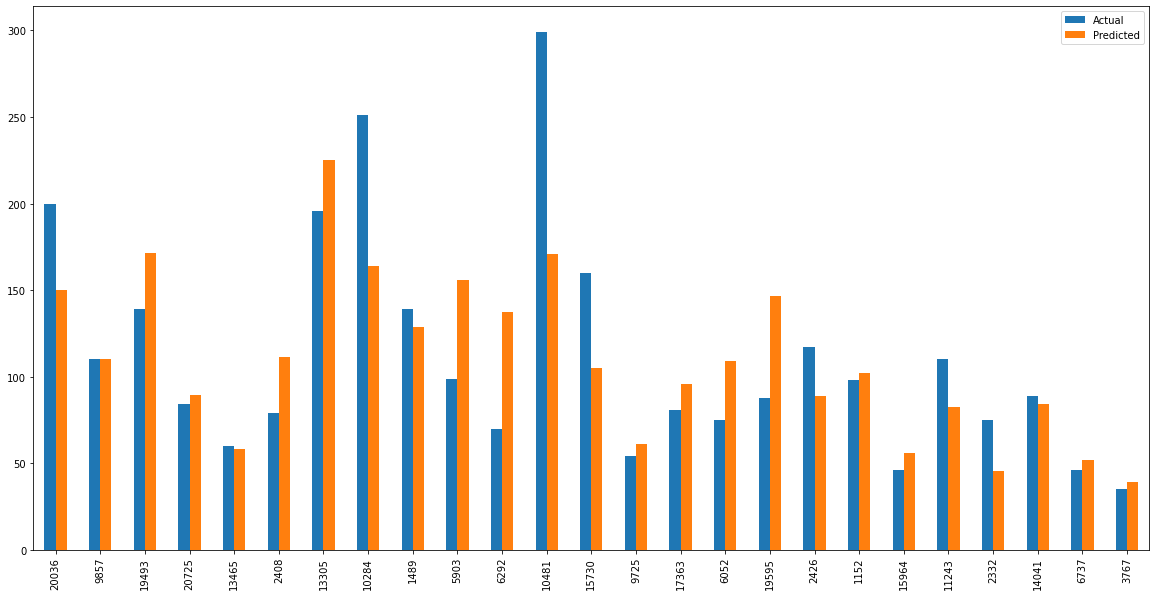

Mean Absolute Error: 50.81740356891838
Mean Squared Error: 26728.714736704813
Root Mean Squared Error: 163.48918843980115


In [30]:
#LightGBM regression
lgbmregressor = LGBMRegressor()
lgbmregressor.fit(x_train, y_train)
y_pred_lgbmreg = lgbmregressor.predict(x_test)
ActualvsPredictedlgbm = pd.DataFrame({'Actual' : y_test, 'Predicted':y_pred_lgbmreg})
print(ActualvsPredictedlgbm)

#Plot Result
plot1 = ActualvsPredictedlgbm.head(25)
plot1.plot(kind='bar',figsize=(20,10))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#Evaluate model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lgbmreg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lgbmreg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbmreg)))